In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
from typing import Tuple

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

from sklearn import datasets

In [3]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
def load_digits():
    return datasets.load_digits()

In [4]:
data = load_digits()

In [5]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
print(df.shape)
data.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [7]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

def predict(n_clusters:int, random_state:int, digits) -> Tuple[KMeans, np.ndarray]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    preds = kmeans.fit_predict(digits)
    return kmeans, preds

In [8]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
model, clusters = predict(n_clusters=10, random_state=0, digits=data.data)
model.cluster_centers_.shape

D:\Egyetem\BevAdat\FQQQOC_BEVADAT2022232\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

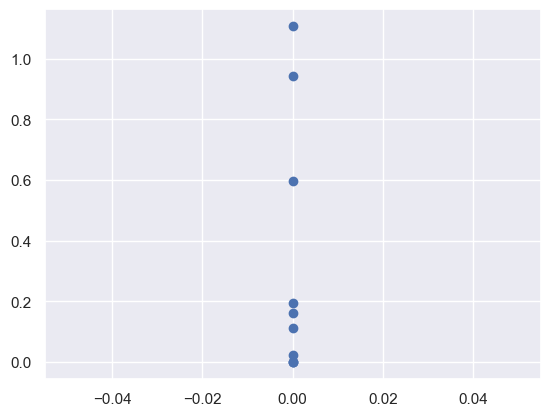

In [9]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])
plt.show()

In [10]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray
def get_labels(clusters:np.ndarray, digits):
    result = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        subarray = digits.target[mask]
        mode = np.bincount(subarray).argmax()
        result[mask] = mode
    return result

In [11]:
labels = get_labels(clusters,data)
labels

array([0, 8, 8, ..., 8, 9, 9])

In [12]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t
def calc_accuracy(target_labels:np.ndarray, predicted_labels:np.ndarray) -> float:
    return round(accuracy_score(target_labels, predicted_labels), 2)

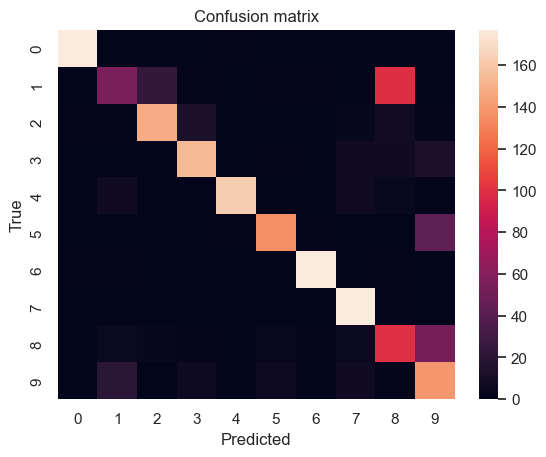

In [13]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
conf_matrix = confusion_matrix(data.target, labels)
sns.heatmap(conf_matrix)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')

plt.show()

In [15]:
from HAZI.HAZI09.HAZI09 import KMeansOnDigits

clf = KMeansOnDigits(10, 0)
clf.load_dataset()
clf.predict()
clf.get_labels()
clf.calc_accuracy()
clf.confusion_matrix()

D:\Egyetem\BevAdat\FQQQOC_BEVADAT2022232\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


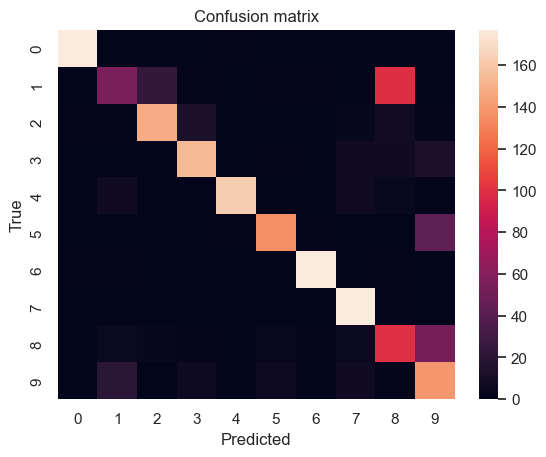

In [16]:
sns.heatmap(clf.mat)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')

plt.show()